In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [6]:
data3=xr.open_dataset("SI_non_dim.nc")

In [7]:
S2 = 0.25
gamma = 0.81 #0.5*(1+(1+2)**(-1))
omega1 = data3.growth_rate.isel(delta=0,N=0,gamma_index=0) #np.linspace(0,1.6,41)#np.arange(0,1.5,0.01)

##### S2

In [8]:
omega1

<xarray.DataArray 'growth_rate' (t: 1, k: 51, gr_i: 1)>
[51 values with dtype=float64]
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0
  * gr_i         (gr_i) float64 0.0

In [9]:
def theta(omega):
    top = -1*(1+omega**2)*(1-gamma)+gamma*S2
    bottom = 1+omega**2
    return -1*(top/bottom)**(0.5)

In [10]:
def k(omega):
    t = theta(omega)
    tp = (1+S2+omega**2)*(np.arctan(t)+np.pi)
    bttm = S2*(-1*(1+omega**2)*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [11]:
def k_shift(omega,q):
    tp = (1+S2+np.power(omega,2))*(q)
    bttm = S2*(-1*(1+np.power(omega,2))*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [12]:
def w_max():
    return (gamma*S2/(1-gamma)-1)**(0.5)

In [13]:
k_list = k(omega1)

In [14]:
theta(omega1)

<xarray.DataArray 'growth_rate' (t: 1, k: 51, gr_i: 1)>
array([[[-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.1118034 ],
        [-0.10650931],
        [-0.10008378],
        [-0.09438691],
        [-0.08930261],
        [-0.08473808],
...
        [-0.05261734],
        [-0.05101898],
        [-0.04951735],
        [-0.04810403],
        [-0.04677154],
        [-0.04551324],
        [-0.04432319],
        [-0.04319606],
        [-0.04212706],
        [-0.04111188],
        [-0.04014661],
        [-0.03922772],
        [-0.03835201],
        [-0.03751656],
        [-0.03671869],
        [-0.03595599],
        [-0.03522622],
        [-0.03452733],
        [-0.03385745],
        [-0.03321484]]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0
  * gr_i         (gr_i) float64 0.0

In [15]:
omega1[0,:]

<xarray.DataArray 'growth_rate' (k: 51, gr_i: 1)>
array([[1.853425e-17],
       [2.445230e-15],
       [2.667893e-15],
       [1.930555e-15],
       [2.008709e-15],
       [1.790129e-15],
       [4.517410e-15],
       [5.079963e-15],
       [5.313723e-15],
       [3.684819e-15],
       [3.240086e-15],
       [3.389770e-15],
       [4.349899e-15],
       [3.405895e-15],
       [4.345557e-15],
       [7.576446e-02],
       [1.114233e-01],
       [1.343654e-01],
       [1.511842e-01],
       [1.642486e-01],
       [1.747512e-01],
       [1.833946e-01],
       [1.906327e-01],
       [1.967771e-01],
       [2.020514e-01],
       [2.066213e-01],
       [2.106125e-01],
       [2.141226e-01],
       [2.172286e-01],
       [2.199923e-01],
       [2.224634e-01],
       [2.246828e-01],
       [2.266844e-01],
       [2.284964e-01],
       [2.301423e-01],
       [2.316422e-01],
       [2.330132e-01],
       [2.342697e-01],
       [2.354244e-01],
       [2.364881e-01],
       [2.374702e-01],
       [2.383790e-01],
       [2.392216e-01],
       [2.400044e-01],
       [2.407329e-01],
       [2.414121e-01],
       [2.420464e-01],
       [2.426396e-01],
       [2.431954e-01],
       [2.437167e-01],
       [2.442064e-01]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
    t            int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0
  * gr_i         (gr_i) float64 0.0

In [16]:
k_list[0,:]

<xarray.DataArray 'growth_rate' (k: 51, gr_i: 1)>
array([[ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 67.75848654],
       [ 71.37188749],
       [ 76.26507408],
       [ 81.15440503],
       [ 86.0394005 ],
       [ 90.91962506],
...
       [148.98154567],
       [153.76890515],
       [158.54707172],
       [163.31577904],
       [168.07476459],
       [172.82376955],
       [177.56253875],
       [182.29082057],
       [187.00836695],
       [191.7149333 ],
       [196.41027852],
       [201.09416499],
       [205.76635857],
       [210.42662857],
       [215.07474783],
       [219.71049265],
       [224.33364286],
       [228.94398183],
       [233.54129646],
       [238.12537723]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
    t            int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0
  * gr_i         (gr_i) float64 0.0

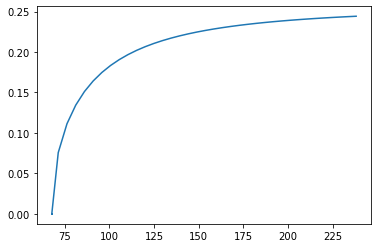

In [17]:
plt.plot(k_list[0,:],omega1[0,:])
# plt.xticks(np.arange(8,32,1))
plt.show()

In [18]:
# data3.growth_rate.isel(delta=0,N=0,t=0,gamma_index=0).values
data3

<xarray.Dataset>
Dimensions:      (k: 51, t: 1, N: 1, delta: 1, gamma_index: 1, gr_i: 1)
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * t            (t) int32 0
  * N            (N) float64 0.003162
  * delta        (delta) int32 0
  * gamma_index  (gamma_index) float64 0.0
  * gr_i         (gr_i) float64 0.0
Data variables:
    growth_rate  (t, N, delta, gamma_index, k, gr_i) float64 ...
    gamma        (t, N, delta, gamma_index, k) float64 ...

Text(0, 0.5, 'Growth Rate')

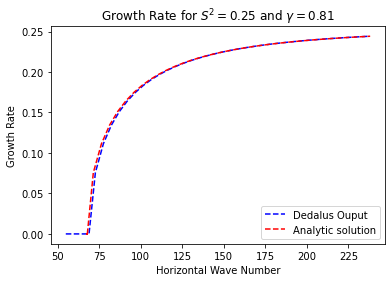

In [19]:
shft = 2.45#4*np.pi/6
k_m = data3.k[:]+k_shift(data3.growth_rate.isel(delta=0,N=0,gamma_index=0),shft)[0,:]
plt.plot(k_m[:],data3.growth_rate.isel(t=0,N=0,delta=0,gamma_index=0)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
plt.plot(k_list[0,:],omega1[0,:],linestyle="dashed",c="r", label="Analytic solution")
# plt.hlines(w_max(),xmin=np.min([np.array([k_list[0]]),k_m.values[0]]),xmax=np.max([np.array([k_list[-1]]),k_m.values[-1]]),linestyles="dotted",color="k",label="Upper Limit of Analytical Solution")
plt.legend(loc="lower right")
plt.title(f"Growth Rate for $S^2=${S2} and $\gamma=${gamma}")
plt.xlabel("Horizontal Wave Number")
plt.ylabel("Growth Rate")

In [20]:
diff = (k_list[0,:]-data3.k[:])
omg = data3.growth_rate.isel(delta=0,N=0,gamma_index=0)
top= (1+S2+np.power(omg,2))
bttm = S2*(-1*(1+np.power(omg,2))*(1-gamma)+gamma*S2)
np.median(diff*(bttm)**(0.5)/top)

2.452531935012139

In [21]:
diff*(bttm)**(0.5)/top

<xarray.DataArray (k: 51, gr_i: 1, t: 1)>
array([[[3.03025164]],

       [[2.98553028]],

       [[2.94080892]],

       [[2.89608756]],

       [[2.8513662 ]],

       [[2.80664484]],

       [[2.76192348]],

       [[2.71720212]],

       [[2.67248076]],

       [[2.6277594 ]],

...

       [[2.45404643]],

       [[2.45442903]],

       [[2.45475616]],

       [[2.45503076]],

       [[2.45525551]],

       [[2.45543286]],

       [[2.45556507]],

       [[2.45565421]],

       [[2.45570218]],

       [[2.45571073]]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0
  * gr_i         (gr_i) float64 0.0

In [22]:
k_shift(data3.growth_rate.isel(delta=0,N=0,gamma_index=0),shft)[:]

<xarray.DataArray 'growth_rate' (t: 1, k: 51, gr_i: 1)>
array([[[ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 54.78366545],
        [ 57.60569323],
        [ 61.42642836],
        [ 65.24341272],
        [ 69.05641747],
        [ 72.86521513],
...
        [118.16185665],
        [121.89595535],
        [125.62282963],
        [129.342278  ],
        [133.05410109],
        [136.75810174],
        [140.454085  ],
        [144.1418582 ],
        [147.82123098],
        [151.49201533],
        [155.15402564],
        [158.80707875],
        [162.45099394],
        [166.08559301],
        [169.71070029],
        [173.32614269],
        [176.93174972],
        [180.52735352],
        [184.11278886],
        [187.68789325]]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0
  * gr_i         (gr_i) float64 0.0

In [36]:
data4=xr.open_dataset("SI_non_dim_field.nc")

In [37]:
k_m = data4.k[:]
plt.plot(k_m[:],data4.growth_rate.isel(delta=0,N=0,gamma_index=0)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

AttributeError: 'Dataset' object has no attribute 'growth_rate'

In [38]:
data5=xr.open_dataset("SI_non_dim_field.nc")

In [39]:
data5.k

<xarray.DataArray 'k' (k: 51)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int32)
Coordinates:
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 41 42 43 44 45 46 47 48 49 50

Text(0.5, 0, 'v-velocity')

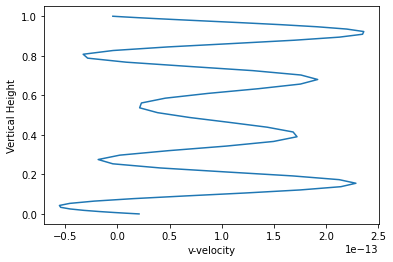

In [42]:
plt.plot(data5.v_structure.sel(k=30),data5.z)
plt.ylabel("Vertical Height")
plt.xlabel("v-velocity")